# Prediction of CO2 Emission per Country
### Pappo, Katz, Pimenta Silva, Tuncel

## Importing and Downloading

In [1]:
import numpy as np
import pandas as pd

In [2]:
df_CO2_brut = pd.read_csv('data/GCB2022v27_MtCo2_flat.csv')
# df_CO2

In [3]:
df_GEI_brut = pd.read_csv('data/Global Economy Indicators.csv')
# df_GEI_brut

## Cleaning the datasets

In [4]:
# Drop rows where year is less than 1970
df_CO2 = df_CO2_brut.drop(df_CO2_brut[df_CO2_brut['Year'] < 1970].index)

df_CO2 = df_CO2.drop(columns=['ISO 3166-1 alpha-3'])

# Replace NaN values with 0
df_CO2 = df_CO2.replace(np.nan, 0)

# Delete spaces in column names
df_CO2.columns = df_CO2.columns.str.strip()

df_CO2['Country'] = df_CO2['Country'].replace({
    'USA': 'United States of America', 
    "Côte d'Ivoire": "Ivory Coast",
    'Congo': 'Republic of the Congo',
    'Viet Nam': 'Vietnam',
    'Tanzania': 'United Republic of Tanzania',
})

df_CO2.reset_index(drop=True, inplace=True)
# df_CO2.head()

In [5]:
# Drop columns that are not needed
df_GEI = df_GEI_brut.drop(columns=[
    ' Currency ',
    ' AMA exchange rate ', 
    ' IMF based exchange rate ', 
    ' Changes in inventories ', 
    ' Other Activities (ISIC J-P) '])

# Delete spaces in column names
df_GEI.columns = df_GEI.columns.str.strip()

# Delete spaces in Country names
df_GEI['Country'] = df_GEI['Country'].str.strip()

# Replace some country names
df_GEI['Country'] = df_GEI['Country'].replace({
    'United States': 'United States of America', 
    'Russian Federation': 'Russia',
    'Venezuela (Bolivarian Republic of)': 'Venezuela',
    'D.R. of the Congo': 'Democratic Republic of the Congo',
    'Congo': 'Republic of the Congo',
    'Bolivia (Plurinational State of)': 'Bolivia',
    'Türkiye': 'Turkey',
    'U.R. of Tanzania: Mainland': 'Tanzania',
    'Iran (Islamic Republic of)': 'Iran',
    "Lao People's DR": 'Laos',
    'Viet Nam': 'Vietnam',
    'D.P.R. of Korea': 'North Korea',
    'Republic of Korea': 'South Korea',
    "Côte d'Ivoire": "Ivory Coast",
    'U.R. of Tanzania: Mainland': 'United Republic of Tanzania',
})


df_GEI.reset_index(drop=True, inplace=True)

# Rename columns
df_GEI.rename(columns={
    'Agriculture, hunting, forestry, fishing (ISIC A-B)': 'Agriculture & Fishing',
    'Construction (ISIC F)': 'Construction',
    'Exports of goods and services': 'Exports',
    'Final consumption expenditure': 'Final Consumption',
    'General government final consumption expenditure': 'Gov. Consumption',
    'Gross capital formation': 'Gross Capital Formation',
    'Gross fixed capital formation (including Acquisitions less disposals of valuables)': 'Gross Fixed Capital',
    'Household consumption expenditure (including Non-profit institutions serving households)': 'Household Consumption',
    'Imports of goods and services': 'Imports',
    'Manufacturing (ISIC D)': 'Manufacturing',
    'Mining, Manufacturing, Utilities (ISIC C-E)': 'Mining & Utilities',
    'Total Value Added': 'Total Value Added',
    'Transport, storage and communication (ISIC I)': 'Transport & Comm.',
    'Wholesale, retail trade, restaurants and hotels (ISIC G-H)': 'Wholesale & Retail',
    'Gross National Income(GNI) in USD': 'GNI (USD)',
    'Gross Domestic Product (GDP)': 'GDP',
    'Total': 'Total'
}, inplace=True)

# Fill NaN values with the mean of the column
# for col in df_GEI.columns: print(f'{col}: {df_GEI[col].isnull().mean() * 100:.2f}% null')
for col in df_GEI.columns: df_GEI[col] = df_GEI[col].fillna("NA" if df_GEI[col].dtype == 'O' else df_GEI[col].mean())

# df_GEI.head()

### Merging Datasets

In [6]:
# Merge the two dataframes on 'Country' and 'Year'
df = df_GEI.merge(df_CO2, on=['Country', 'Year'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9631 entries, 0 to 9630
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CountryID                9631 non-null   int64  
 1   Country                  9631 non-null   object 
 2   Year                     9631 non-null   int64  
 3   Population               9631 non-null   int64  
 4   Per capita GNI           9631 non-null   int64  
 5   Agriculture & Fishing    9631 non-null   float64
 6   Construction             9631 non-null   float64
 7   Exports                  9631 non-null   float64
 8   Final Consumption        9631 non-null   float64
 9   Gov. Consumption         9631 non-null   float64
 10  Gross Capital Formation  9631 non-null   float64
 11  Gross Fixed Capital      9631 non-null   float64
 12  Household Consumption    9631 non-null   float64
 13  Imports                  9631 non-null   float64
 14  Manufacturing           

## Vizualisation

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

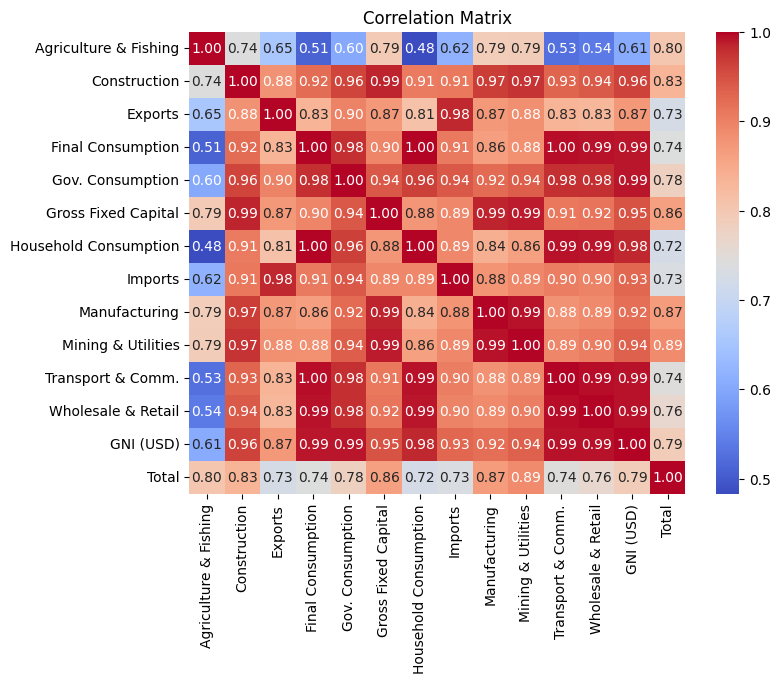

In [8]:
df_corr = df[[
    'Agriculture & Fishing',
    'Construction',
    'Exports',
    'Final Consumption',
    'Gov. Consumption',
    'Gross Fixed Capital',
    'Household Consumption',
    'Imports', 
    'Manufacturing',
    'Mining & Utilities', 
    'Transport & Comm.',
    'Wholesale & Retail',
    'GNI (USD)', 
    'Total']]

plt.figure(figsize=(8, 6))  # Définir la taille de la figure
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Correlation Matrix")
plt.show()

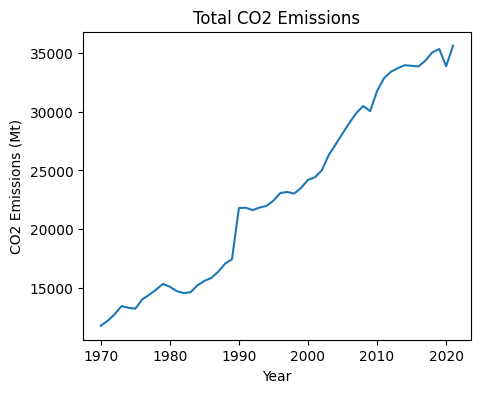

In [9]:
df_total = df[['Year', 'Total']].groupby('Year').sum().reset_index()

plt.figure(figsize=(5, 4))
plt.plot(df_total['Year'], df_total['Total'], label='Total CO2 Emissions')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (Mt)')
plt.title('Total CO2 Emissions')
plt.show() 

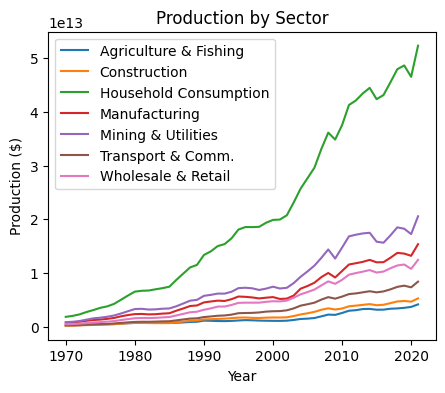

In [10]:
# Group by year and sum the production for each sector and countries
df_prod = df.groupby('Year')[
    ['Agriculture & Fishing', 'Construction', 'Household Consumption', 
     'Manufacturing', 'Mining & Utilities', 'Transport & Comm.', 'Wholesale & Retail']
].sum().reset_index()

# List of sectors
sectors = ['Agriculture & Fishing', 'Construction', 'Household Consumption', 
           'Manufacturing', 'Mining & Utilities', 'Transport & Comm.', 'Wholesale & Retail']

plt.figure(figsize=(5, 4))
for sector in sectors:
    plt.plot(df_prod['Year'], df_prod[sector], label=sector)

plt.xlabel('Year')
plt.ylabel('Production ($)')
plt.title('Production by Sector')
plt.legend()
plt.show()

In [11]:
import geopandas as gpd

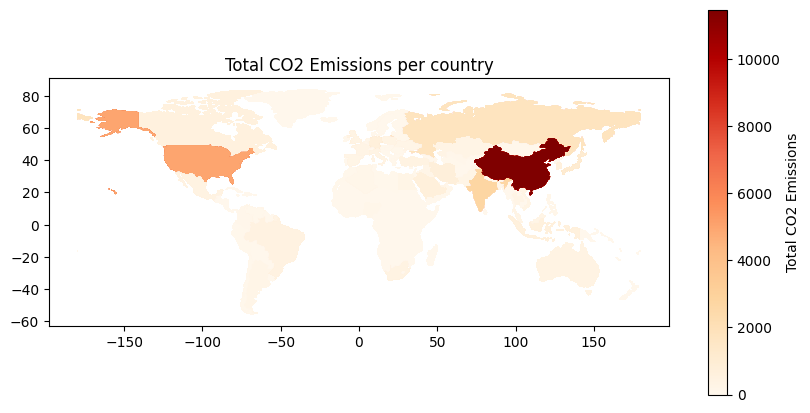

In [12]:
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
gdf = gpd.read_file(url)

df_world = gdf.merge(df, left_on='ADMIN', right_on='Country')

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
df_world.plot(column='Total',
              cmap='OrRd',
              legend=True,
              legend_kwds={'label': "Total CO2 Emissions"},
              ax=ax)

ax.set_title('Total CO2 Emissions per country')
plt.show()

## Prediction

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [16]:
df_pred = df[[
    'Year',
    'Agriculture & Fishing',
    'Construction',
    'Exports',
    'Final Consumption',
    'Gov. Consumption',
    'Gross Fixed Capital',
    'Household Consumption',
    'Imports', 
    'Manufacturing',
    'Mining & Utilities', 
    'Transport & Comm.',
    'Wholesale & Retail',
    'GNI (USD)', 
    'Total']]

# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(df_pred.drop(columns=['Total']))
y = scaler.fit_transform(df_pred['Total'].values.reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression

# Train the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Squared Error: 0.10291697464375081
R2 Score: 0.8719476988501269


### Ridge

In [18]:
from sklearn.linear_model import Ridge

# Train the model
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

y_pred = ridge_model.predict(X_test)

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Squared Error: 0.10351346242938618
R2 Score: 0.8712055313522695


### Lasso

In [19]:
from sklearn.linear_model import Lasso

# Train the model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

y_pred = lasso_model.predict(X_test)

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Squared Error: 0.18282580618466795
R2 Score: 0.7725228003197139


### ElasticNet

In [20]:
from sklearn.linear_model import ElasticNet

# Train the model
elastic_model = ElasticNet(alpha=0.1, l1_ratio=0.1)
elastic_model.fit(X_train, y_train)

y_pred = elastic_model.predict(X_test)

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Squared Error: 0.17211157933361254
R2 Score: 0.7858537538195476


### Decision Tree

In [21]:
from sklearn.tree import DecisionTreeRegressor

# Train the model
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Squared Error: 0.06624530349530573
R2 Score: 0.9175756615241631


### Random Forest Regressor

In [23]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
RFR_model = RandomForestRegressor()
RFR_model.fit(X_train, y_train)

y_pred = RFR_model.predict(X_test)

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

c:\Users\fabie\Documents\Cours\Python\ML\Carbon-Emissions-Analysis\.venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Squared Error: 0.03478944999525372
R2 Score: 0.9567139517747068


In [83]:
future_years = pd.DataFrame({'Year': range(2021, 2041)})
features = df_pred.columns.difference(['Year', 'Total'])

for feature in features:
    # Linear Regression model for each feature
    model = LinearRegression()
    model.fit(df_pred[['Year']], df_pred[feature])
    
    # Prediction for future years
    future_years[feature] = model.predict(future_years[['Year']])

In [87]:
X = df_pred.drop(columns=['Total'])  # Real feature values
y = df_pred['Total']  # Target values


# Reorganize columns to match the order in future_years
# because the model was trained on the same columns
common_columns = future_years.columns.intersection(X.columns)
X = X[common_columns]
missing_columns = future_years.columns.difference(X.columns)
for column in missing_columns:
    X[column] = None

X = X[future_years.columns]

# Train the model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X, y)

# Total CO2 emissions for future years
future_years['Total'] = rf_model.predict(future_years)
future_years['Total']

0     284.706749
1     296.287655
2     321.351717
3     311.134485
4     330.558093
5     337.027983
6     325.344895
7     316.585156
8     315.420585
9     302.903962
10    320.521607
11    315.400983
12    317.935076
13    319.243359
14    321.873582
15    321.417421
16    316.776460
17    322.372448
18    319.796083
19    317.044720
Name: Total, dtype: float64

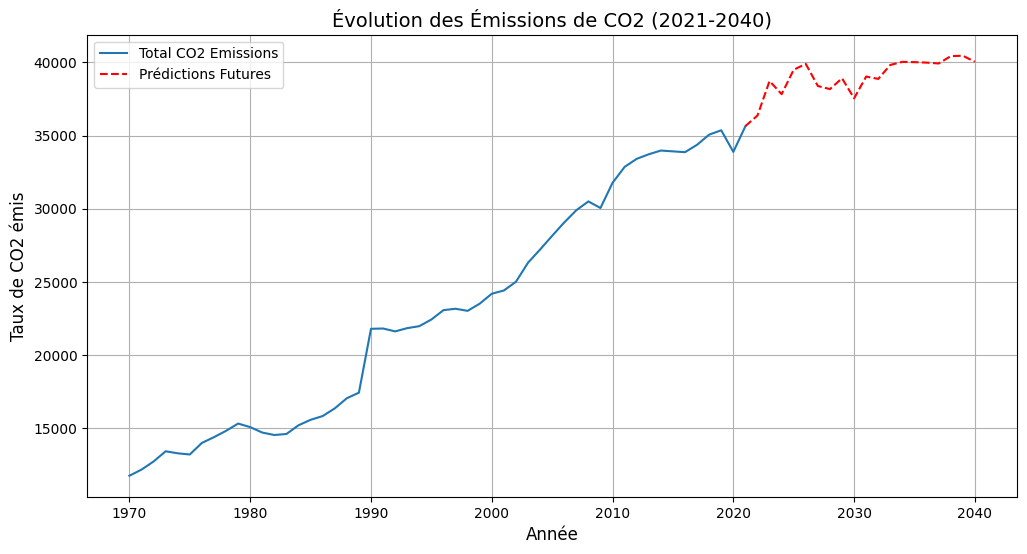

In [85]:
df_combined = pd.concat([df_pred, future_years], ignore_index=True)

plt.figure(figsize=(12, 6))

df_total = df[['Year', 'Total']].groupby('Year').sum().reset_index()
plt.plot(df_total['Year'], df_total['Total'], label='Total CO2 Emissions')
plt.plot(future_years['Year'], (future_years['Total']+80)*100, label="Prédictions Futures", linestyle='--', color='red')
plt.title("Évolution des Émissions de CO2 (2021-2040)", fontsize=14)
plt.xlabel("Année", fontsize=12)
plt.ylabel("Taux de CO2 émis", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

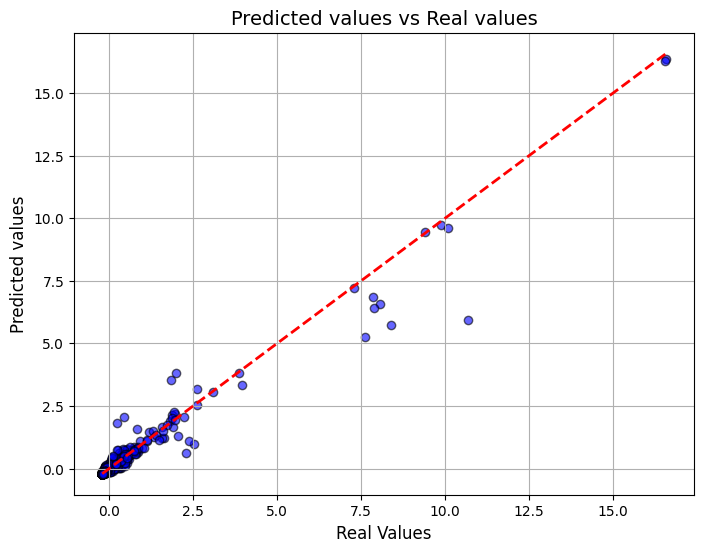

In [25]:
# Predicted values vs Real values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Predicted values vs Real values", fontsize=14)
plt.xlabel("Real Values", fontsize=12)
plt.ylabel("Predicted values", fontsize=12)
plt.grid(True)
plt.show()

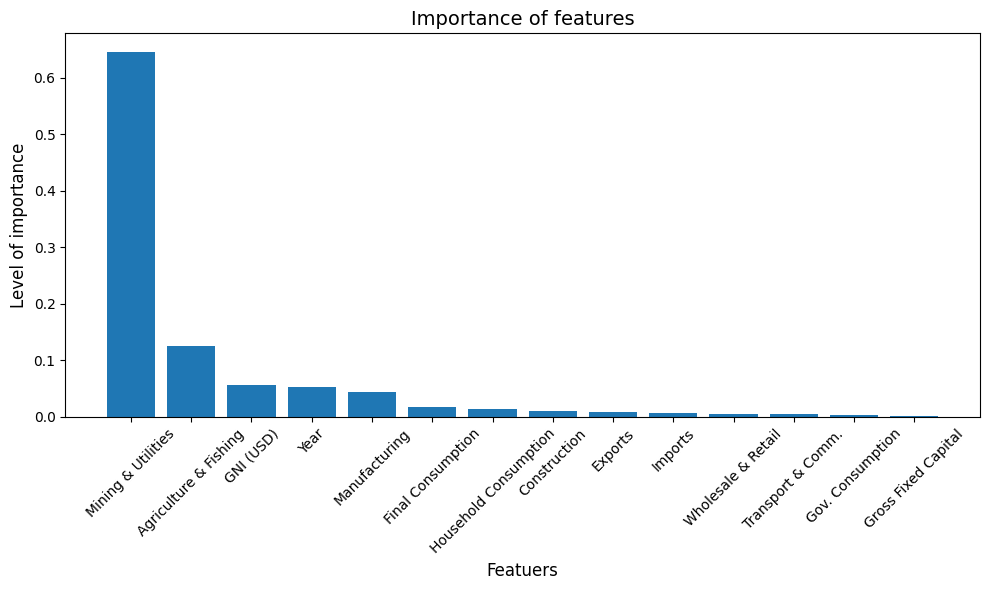

In [29]:
# Feature importances in the Random Forest Regressor model
feature_importances = RFR_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]
feature_names = df_pred.columns

plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=45, fontsize=10)
plt.title("Importance of features", fontsize=14)
plt.xlabel("Featuers", fontsize=12)
plt.ylabel("Level of importance", fontsize=12)
plt.tight_layout()
plt.show()